In [1]:
import os
from tqdm import tqdm
import imageio
from pathlib import Path
from skimage.transform import resize
import random
from matplotlib import pyplot as plt
import numpy as np

from aidefender.utils.data import load_image_dataset
from aidefender.defences.bart import BaRT

# Load Cats and Dogs

In [2]:
data_path = '../artifacts/data/cats_dogs_small/'

cat_sample_id = 8
dog_sample_id = -4
labels = ['dog', 'cat']

In [3]:
images, labels = load_image_dataset(data_path, labels)

dog: only 10 images
cat: only 10 images


In [4]:
data_tuples = [(images[i], labels[i]) for i in range(len(images))]

In [5]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data_tuples, test_size=0.2)

In [6]:
x_train = np.array([item[0] / 255.0 for item in train])

# Apply Barrage of Random Transforms

In [19]:
bart_preprocessor = BaRT()
preprocessed_x_train = bart_preprocessor(x_train, y=None)

100%|██████████| 16/16 [00:00<00:00, 19.55it/s]


In [21]:
preprocessed_x_train = list(preprocessed_x_train[0])

In [22]:
def show_random_images(data, title=None):
    sample_images = random.sample(data, 16)
    
    fig, ax = plt.subplots(4,4, figsize=(14,14))
    idx = 0
    for i in range(0,4):
        for j in range(0,4):
            ax[i,j].imshow(sample_images[idx])
            idx+=1
    plt.plot()           

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


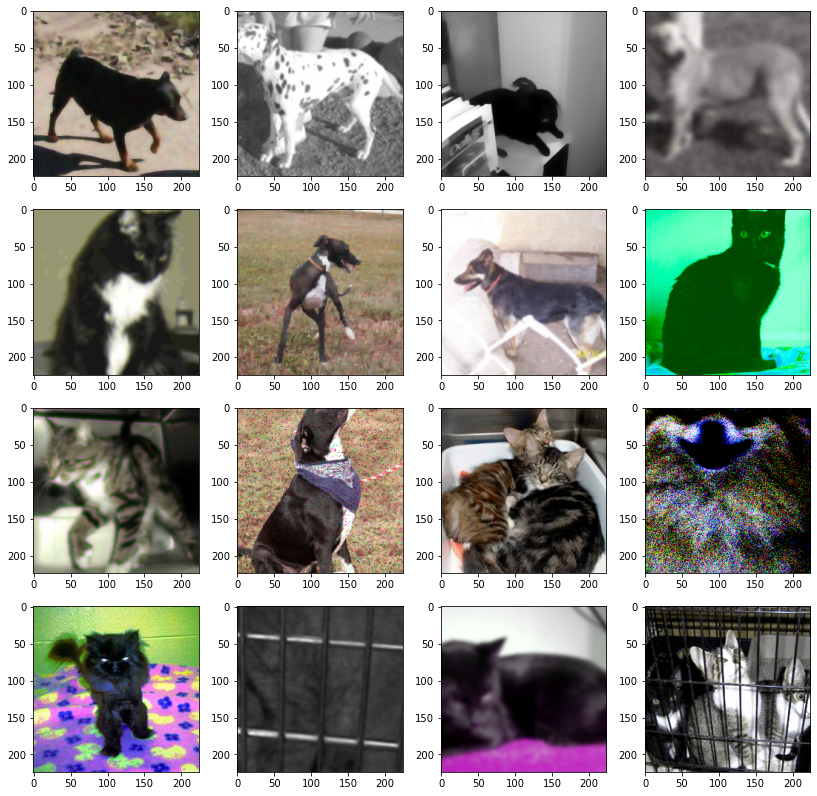

In [23]:
show_random_images(preprocessed_x_train)